In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
warnings.filterwarnings("ignore")

In [4]:
loan_data_file = pd.read_csv(workpath + "loan_data_2007_2014.csv", header = 0, index_col = 0)

In [5]:
#Shape of the original dataset
loan_data_file.shape

(466285, 73)

In [6]:
loan_data_file.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan_data_file.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'ac

### 1. Data information

##### 1.1 Columns having null values

In [8]:
nul = 0
for col in loan_data_file.columns:
    if(loan_data_file[col].isnull().any()):
        nul = nul+ 1
if(nul==0):
    print('There is no Null value present')
else:
    print(nul,'columns have null values')

40 columns have null values


In [9]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

##### 1.2 Percentage of null values on each column

There are 17 columns with 100% missing values. There are 5 columns with 40 - 80% missing values

In [10]:
# Missing values
for column in loan_data_file.columns:
    if loan_data_file[column].isna().sum() != 0:
        missing = loan_data_file[column].isna().sum()
        portion = (missing / loan_data_file.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.2f}%'")

'emp_title': number of missing values '27588' ==> '5.92%'
'emp_length': number of missing values '21008' ==> '4.51%'
'annual_inc': number of missing values '4' ==> '0.00%'
'desc': number of missing values '340302' ==> '72.98%'
'title': number of missing values '20' ==> '0.00%'
'delinq_2yrs': number of missing values '29' ==> '0.01%'
'earliest_cr_line': number of missing values '29' ==> '0.01%'
'inq_last_6mths': number of missing values '29' ==> '0.01%'
'mths_since_last_delinq': number of missing values '250351' ==> '53.69%'
'mths_since_last_record': number of missing values '403647' ==> '86.57%'
'open_acc': number of missing values '29' ==> '0.01%'
'pub_rec': number of missing values '29' ==> '0.01%'
'revol_util': number of missing values '340' ==> '0.07%'
'total_acc': number of missing values '29' ==> '0.01%'
'last_pymnt_d': number of missing values '376' ==> '0.08%'
'next_pymnt_d': number of missing values '227214' ==> '48.73%'
'last_credit_pull_d': number of missing values '42' ==> 

##### 1.3 Datatype of each column

There are 46 columns with float datatype and 5 columns with integer data type and the rest 22 are objects

In [11]:
print(loan_data_file.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 1077501 to 9199665
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   sub_grade                    466285 non-null  object 
 9   emp_title                    438697 non-null  object 
 10  emp_length                   445277 non-null  object 
 11  home_ownership               466285 non-null  object 
 12  annual_inc                   466281 non-null  float

##### 1.4  Number of unique values on each column

In [12]:
print(loan_data_file.nunique())

member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124436
purpose                            14
title                           63098
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs                        24
earliest_cr_line                  664
inq_last_6mt

##### 1.5 Target Variable unique values

In [13]:
loan_data_file['loan_status'].value_counts(normalize=True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Ref: https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction

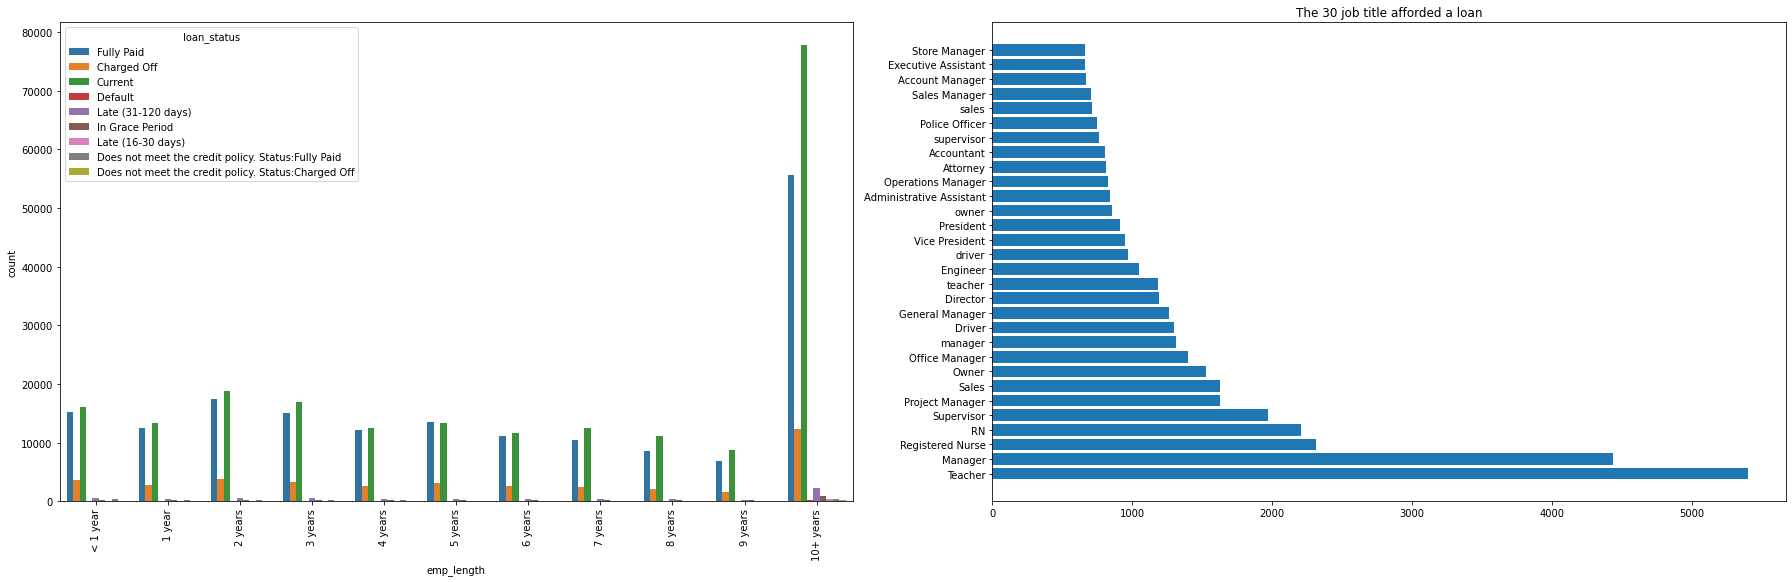

In [14]:
#bivariate analysis   'loan_status' and 'emp_length', 'The 30 job title afforded a loan'
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=loan_data_file, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(loan_data_file.emp_title.value_counts()[:30].index, loan_data_file.emp_title.value_counts()[:30])
plt.title("The 30 job title afforded a loan")
plt.tight_layout()

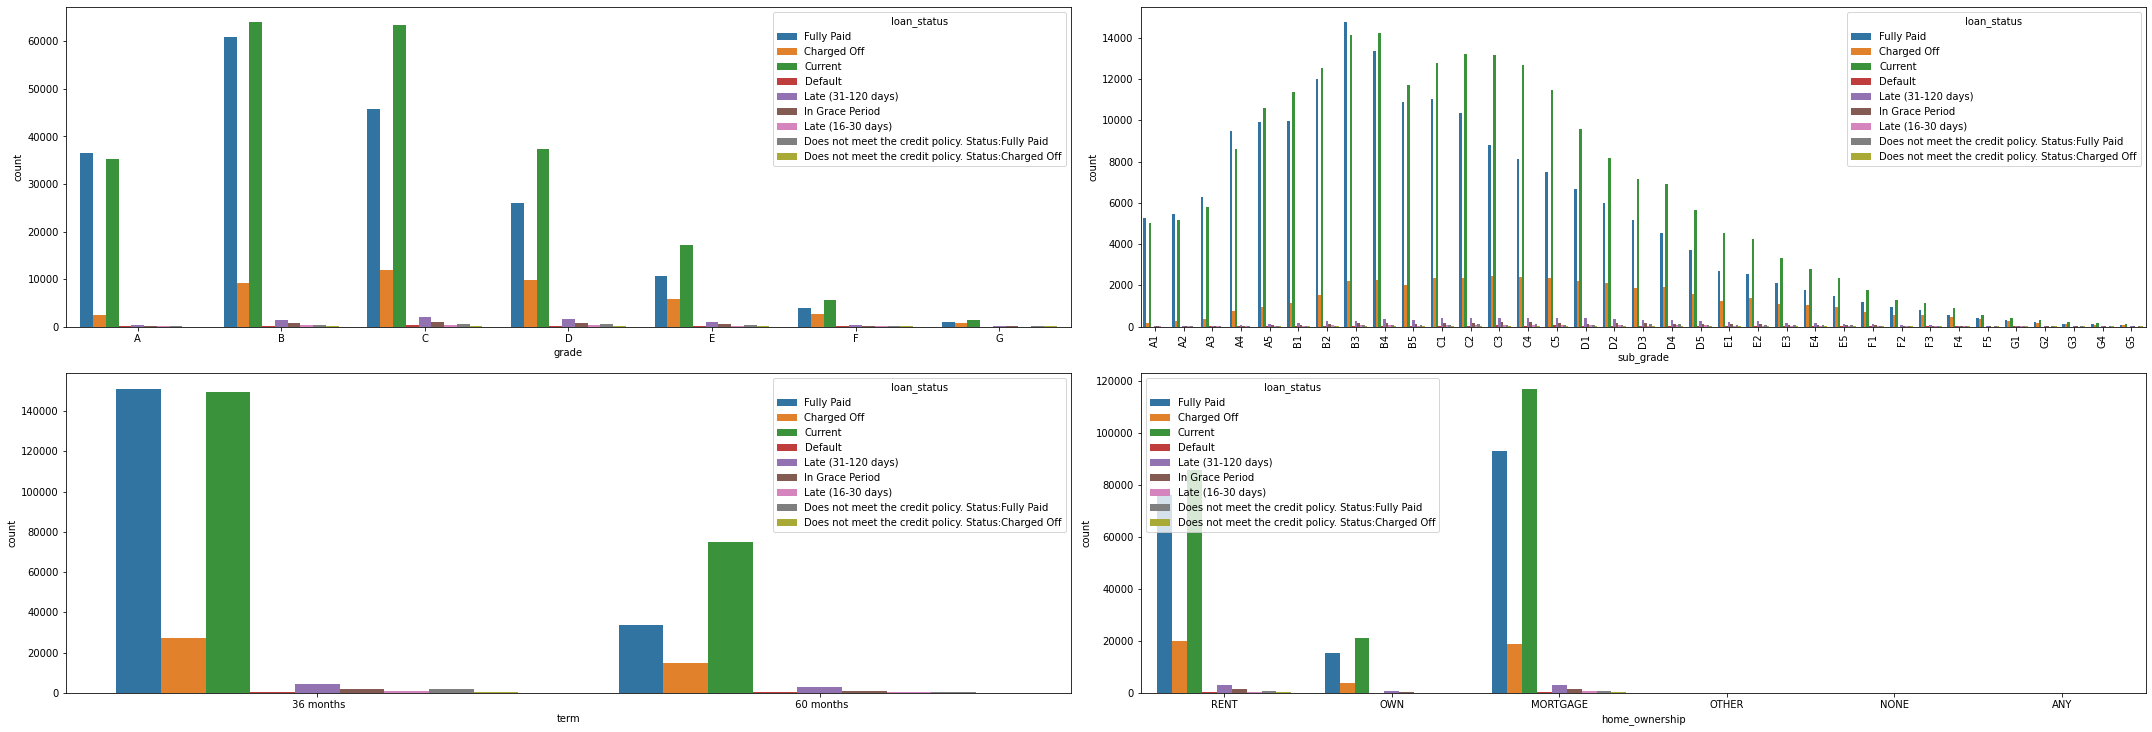

In [15]:
# 'loan_status' and 'grade', 'sub_grade', 'term', 'home_ownership'
plt.figure(figsize=(30, 20))

plt.subplot(4, 2, 1)
grade = sorted(loan_data_file.grade.unique().tolist())
sns.countplot(x='grade', data=loan_data_file, hue='loan_status', order=grade)

plt.subplot(4, 2, 2)
sub_grade = sorted(loan_data_file.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=loan_data_file, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.subplot(4, 2, 3)
sns.countplot(x='term', data=loan_data_file, hue='loan_status')

plt.subplot(4, 2, 4)
sns.countplot(x='home_ownership', data=loan_data_file, hue='loan_status')
plt.tight_layout()

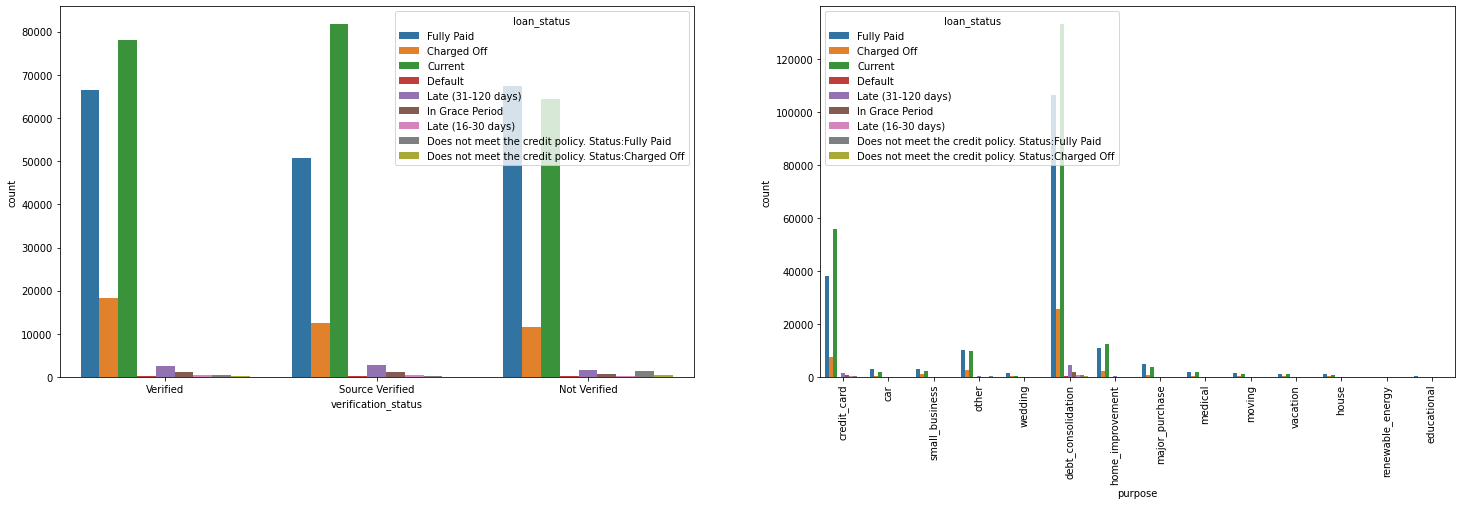

In [16]:
# 'loan_status' and 'verification_status', 'purpose'
plt.figure(figsize=(25,15))

plt.subplot(2, 2, 1)
sns.countplot(x='verification_status', data=loan_data_file, hue='loan_status')

plt.subplot(2, 2, 2)
g = sns.countplot(x='purpose', data=loan_data_file, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Label the target variable 'loan_status' to 0 and 1. 0 stands for Non-fraud, 1 stands for fraud.

In [17]:

# create a new column based on the loan_status column that will be our target variable
loan_data_file['good_bad'] = np.where(loan_data_file.loc[:, 'loan_status'].isin(['Charged Off', 'Default',
                                                                       'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)

Text(0.5, 1.0, 'Pie chart of Target Distribution')

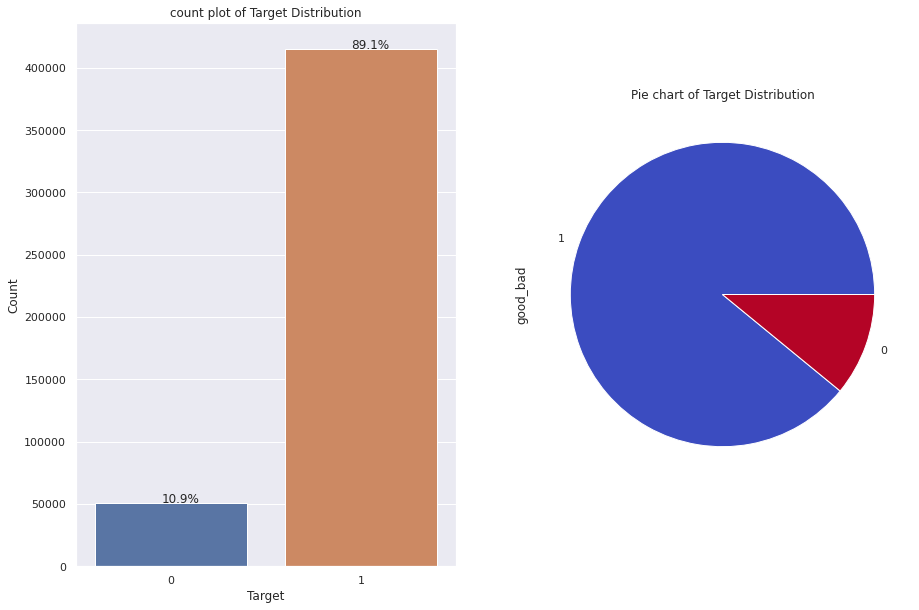

In [18]:
# Visualize the target variable, 10.9% non-fraud, 89.1% fraud.
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(1,2,1)
ax = sns.countplot(loan_data_file['good_bad'])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(loan_data_file)), (p.get_x()+0.35, p.get_height()+1))
ax.set_title('count plot of Target Distribution')
ax.set_xlabel('Target')
ax.set_ylabel('Count')

plt.subplot(1,2,2)
ax = loan_data_file['good_bad'].value_counts().plot(kind='pie', colormap='coolwarm')
ax.set_title('Pie chart of Target Distribution')

### 2. Data cleaning and Pre-processing

##### 2.1 Remove irrelavant columns (redundant and forward looking columns) mentioned below:
'member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 'zip_code', 'addr_state', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'

In [19]:
# drop columns with more than 80% null values
loan_data_file.dropna(thresh = loan_data_file.shape[0]*0.2, how = 'all', axis = 1, inplace = True)

In [20]:
loan_data_file.drop(columns =['member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 
                         'title','zip_code', 'next_pymnt_d', 'recoveries', 'collection_recovery_fee','addr_state', 'mths_since_last_delinq', 
                         'next_pymnt_d', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_last_major_derog'], axis = 1, inplace = True)

In [21]:
# shape of dataset after dropping irrelevant columns
loan_data_file.shape

(466285, 41)

In [22]:
# Drop the original 'loan_status' column
loan_data_file.drop(columns = ['loan_status'], inplace = True)

In [23]:
loan_data_file.tail(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,total_rev_hi_lim,good_bad
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9715141,6000,6000,6000.0,36 months,15.61,209.79,C,C4,7 years,RENT,27000.0,Verified,Jan-14,credit_card,26.13,0.0,Nov-93,3.0,8.0,1.0,6025,57.4,16.0,f,0.00,0.00,6865.500000,6865.50,5999.95,865.55,0.0,Mar-15,126.16,Jan-16,0.0,1,INDIVIDUAL,0.0,10500.0,1
9695736,8525,8525,8525.0,60 months,18.25,217.65,D,D3,5 years,MORTGAGE,37536.0,Verified,Jan-14,medical,12.28,4.0,Nov-94,0.0,12.0,0.0,5318,10.7,26.0,f,0.00,0.00,2029.930000,2029.93,360.08,510.45,0.0,May-14,217.65,Oct-14,0.0,1,INDIVIDUAL,0.0,49800.0,0
9007579,18000,18000,17975.0,36 months,7.90,563.23,A,A4,3 years,RENT,90000.0,Verified,Jan-14,debt_consolidation,10.33,1.0,Jul-98,0.0,16.0,0.0,8224,16.3,33.0,f,0.00,0.00,5631.670000,5623.85,4580.89,1050.78,0.0,Nov-14,563.23,Oct-14,0.0,1,INDIVIDUAL,0.0,50300.0,0
9745590,10000,10000,10000.0,36 months,18.25,362.78,D,D3,10+ years,RENT,42000.0,Source Verified,Jan-14,vacation,11.57,0.0,Jun-02,0.0,9.0,0.0,3196,28.8,24.0,f,0.00,0.00,12394.165200,12394.17,10000.00,2394.17,0.0,Sep-15,5501.60,Jan-16,0.0,1,INDIVIDUAL,0.0,11100.0,1
9745484,15000,15000,15000.0,36 months,13.53,509.25,B,B5,4 years,RENT,66000.0,Source Verified,Jan-14,credit_card,16.22,0.0,Aug-99,0.0,8.0,0.0,16901,96.0,20.0,w,5685.63,5685.63,12222.000000,12222.00,9314.37,2907.63,0.0,Jan-16,509.25,Jan-16,0.0,1,INDIVIDUAL,0.0,17600.0,1
8598660,18400,18400,18400.0,60 months,14.47,432.64,C,C2,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,debt_consolidation,19.85,0.0,Apr-03,2.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,Jan-16,432.64,Jan-16,0.0,1,INDIVIDUAL,0.0,29900.0,1
9684700,22000,22000,22000.0,60 months,19.97,582.50,D,D5,10+ years,MORTGAGE,78000.0,Verified,Jan-14,debt_consolidation,18.45,0.0,Jun-97,5.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,Dec-14,17.50,Jan-16,0.0,1,INDIVIDUAL,0.0,39400.0,0
9584776,20700,20700,20700.0,60 months,16.99,514.34,D,D1,7 years,MORTGAGE,46000.0,Verified,Jan-14,debt_consolidation,25.65,0.0,Dec-01,2.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,Jan-16,514.34,Dec-15,0.0,1,INDIVIDUAL,0.0,13100.0,1
9604874,2000,2000,2000.0,36 months,7.90,62.59,A,A4,3 years,OWN,83000.0,Verified,Jan-14,credit_card,5.39,3.0,Feb-03,1.0,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,Dec-14,1500.68,Apr-15,0.0,1,INDIVIDUAL,0.0,53100.0,1


2.3 Impute nan values in some columns.

In [24]:
# To see which columns still have the nan values, and impute these nan values. 
loan_data_file.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv             

Other Data cleaning tasks that are required as follows (Ref: https://github.com/finlytics-hub/credit_risk_model/blob/master/Credit_Risk_Model_and_Credit_Scorecard.ipynb)

*   Remove text from the emp_length column (e.g., years) and convert it to numeric
*   For all columns with dates: convert them to Python’s datetime format, create a new column as a difference between model development date and the respective date feature and then drop the original feature
*   Remove text from the term column and convert it to numeric


 2.3.1 Emp_Length
 - Impute nan values in 'emp_length'

In [ ]:
# function to clean up the emp_length column, assign 0 to NANs, and convert to numeric
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)

In [ ]:
# apply to df
emp_length_converter(loan_data_file, 'emp_length')

loan_data_file['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

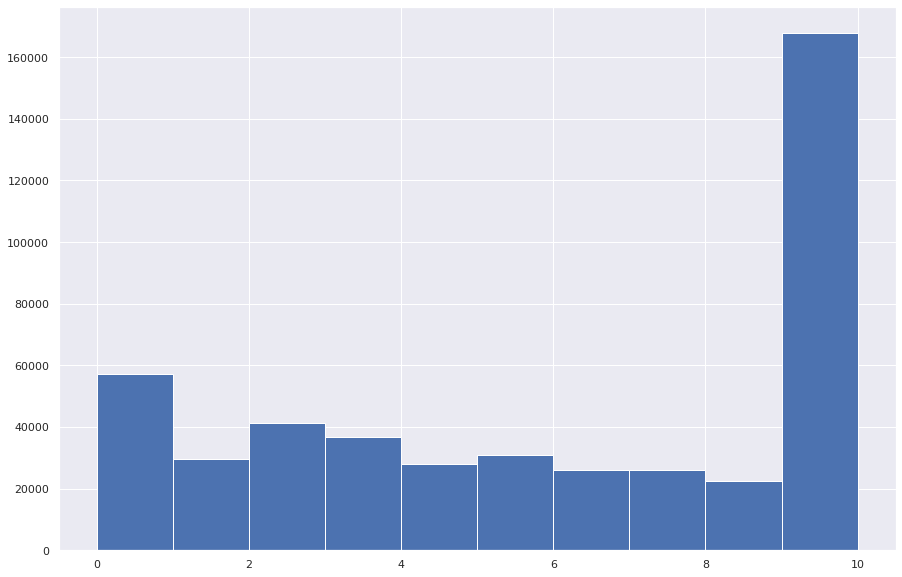

In [ ]:
# Visualize 'emp_length' after impute the nan values
loan_data_file['emp_length'].hist(bins=10)

2.3.2 Date Columns: transform to datetime format.

In [ ]:
'''
function to convert date columns to datetime format and
create a new column as a difference between today and the respective date
'''
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / 
							np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(
		lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)

In [ ]:
# apply to df
date_columns(loan_data_file, 'earliest_cr_line')
date_columns(loan_data_file, 'issue_d')
date_columns(loan_data_file, 'last_pymnt_d')
date_columns(loan_data_file, 'last_credit_pull_d')

# let's check these new columns
print(loan_data_file['mths_since_earliest_cr_line'].describe())
print(loan_data_file['mths_since_issue_d'].describe())
print(loan_data_file['mths_since_last_pymnt_d'].describe())
print(loan_data_file['mths_since_last_credit_pull_d'].describe())

count    466256.000000
mean        274.385374
std          86.460310
min         105.000000
25%         216.000000
50%         258.000000
75%         317.000000
max         619.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    466285.000000
mean         83.255187
std          14.340154
min          68.000000
25%          73.000000
50%          79.000000
75%          89.000000
max         158.000000
Name: mths_since_issue_d, dtype: float64
count    465909.000000
mean         63.294369
std          12.809898
min          55.000000
25%          55.000000
50%          56.000000
75%          67.000000
max         152.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    466243.000000
mean         59.045588
std           9.636423
min          55.000000
25%          55.000000
50%          55.000000
75%          57.000000
max         159.000000
Name: mths_since_last_credit_pull_d, dtype: float64


2.3.3 Term
- Transform string column 'term' to numerical. 

In [ ]:
# function to remove 'months' string from the 'term' column and convert it to numeric
def loan_term_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

In [ ]:
loan_term_converter(loan_data_file, 'term')

In [ ]:
loan_data_file['term'].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term, dtype: float64

In [ ]:
loan_data_file['total_rev_hi_lim'].describe()

count    3.960090e+05
mean     3.037909e+04
std      3.724713e+04
min      0.000000e+00
25%      1.350000e+04
50%      2.280000e+04
75%      3.790000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

In [ ]:
loan_data_file['total_rev_hi_lim'].isnull().sum()

70276

In [ ]:
from sklearn.impute import SimpleImputer

### Handling missing values by Imputation

In [ ]:
4
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
loan_data_file.total_rev_hi_lim = imputer.fit_transform(loan_data_file['total_rev_hi_lim'].values.reshape(-1,1))[:,0]
loan_data_file.acc_now_delinq = imputer.fit_transform(loan_data_file['acc_now_delinq'].values.reshape(-1,1))[:,0]

In [ ]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
loan_data_file.emp_length = imputer.fit_transform(loan_data_file['emp_length'].values.reshape(-1,1))[:,0]
loan_data_file.revol_util = imputer.fit_transform(loan_data_file['revol_util'].values.reshape(-1,1))[:,0]

In [ ]:
loan_data_file.tail(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,total_rev_hi_lim,good_bad,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8598660,18400,18400,18400.0,60,14.47,432.64,C,C2,4.0,MORTGAGE,110000.0,Source Verified,debt_consolidation,19.85,0.0,2.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,432.64,0.0,1,INDIVIDUAL,0.0,29900.0,1,208.0,79.0,55.0,55.0
9684700,22000,22000,22000.0,60,19.97,582.50,D,D5,10.0,MORTGAGE,78000.0,Verified,debt_consolidation,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,17.50,0.0,1,INDIVIDUAL,0.0,39400.0,0,278.0,79.0,68.0,55.0
9584776,20700,20700,20700.0,60,16.99,514.34,D,D1,7.0,MORTGAGE,46000.0,Verified,debt_consolidation,25.65,0.0,2.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,514.34,0.0,1,INDIVIDUAL,0.0,13100.0,1,224.0,79.0,55.0,56.0
9604874,2000,2000,2000.0,36,7.90,62.59,A,A4,3.0,OWN,83000.0,Verified,credit_card,5.39,3.0,1.0,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,1500.68,0.0,1,INDIVIDUAL,0.0,53100.0,1,210.0,79.0,68.0,64.0
9199665,10000,10000,9975.0,36,19.20,367.58,D,D3,10.0,MORTGAGE,46000.0,Verified,other,22.78,1.0,0.0,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,367.58,0.0,1,INDIVIDUAL,0.0,16000.0,1,246.0,79.0,55.0,55.0


In [ ]:
print(loan_data_file.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 1077501 to 9199665
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      466285 non-null  int64  
 1   funded_amnt                    466285 non-null  int64  
 2   funded_amnt_inv                466285 non-null  float64
 3   term                           466285 non-null  int64  
 4   int_rate                       466285 non-null  float64
 5   installment                    466285 non-null  float64
 6   grade                          466285 non-null  object 
 7   sub_grade                      466285 non-null  object 
 8   emp_length                     466285 non-null  float64
 9   home_ownership                 466285 non-null  object 
 10  annual_inc                     466281 non-null  float64
 11  verification_status            466285 non-null  object 
 12  purpose                

In [ ]:
loan_data_file.to_csv(workpath + 'loan_data_clean.csv', index = False)

### 2.2 Exploratory Data Analysis on the cleaned dataset
Ref: https://github.com/rahul3687/Exploratory-data-analysis-python/blob/main/credit_eda.ipynb

In [ ]:
# Splitting dataframes to non-defaulters and defaulters
defaulters = loan_data_file[loan_data_file['good_bad'] == 0]
non_defaulter = loan_data_file[loan_data_file['good_bad'] == 1]

In [ ]:
# find correlation
columns = list(loan_data_file.select_dtypes(exclude='object').columns)
columns.remove('policy_code') 
columns.remove('good_bad') # remove the target variable
corr = loan_data_file[columns].corr()
#corr

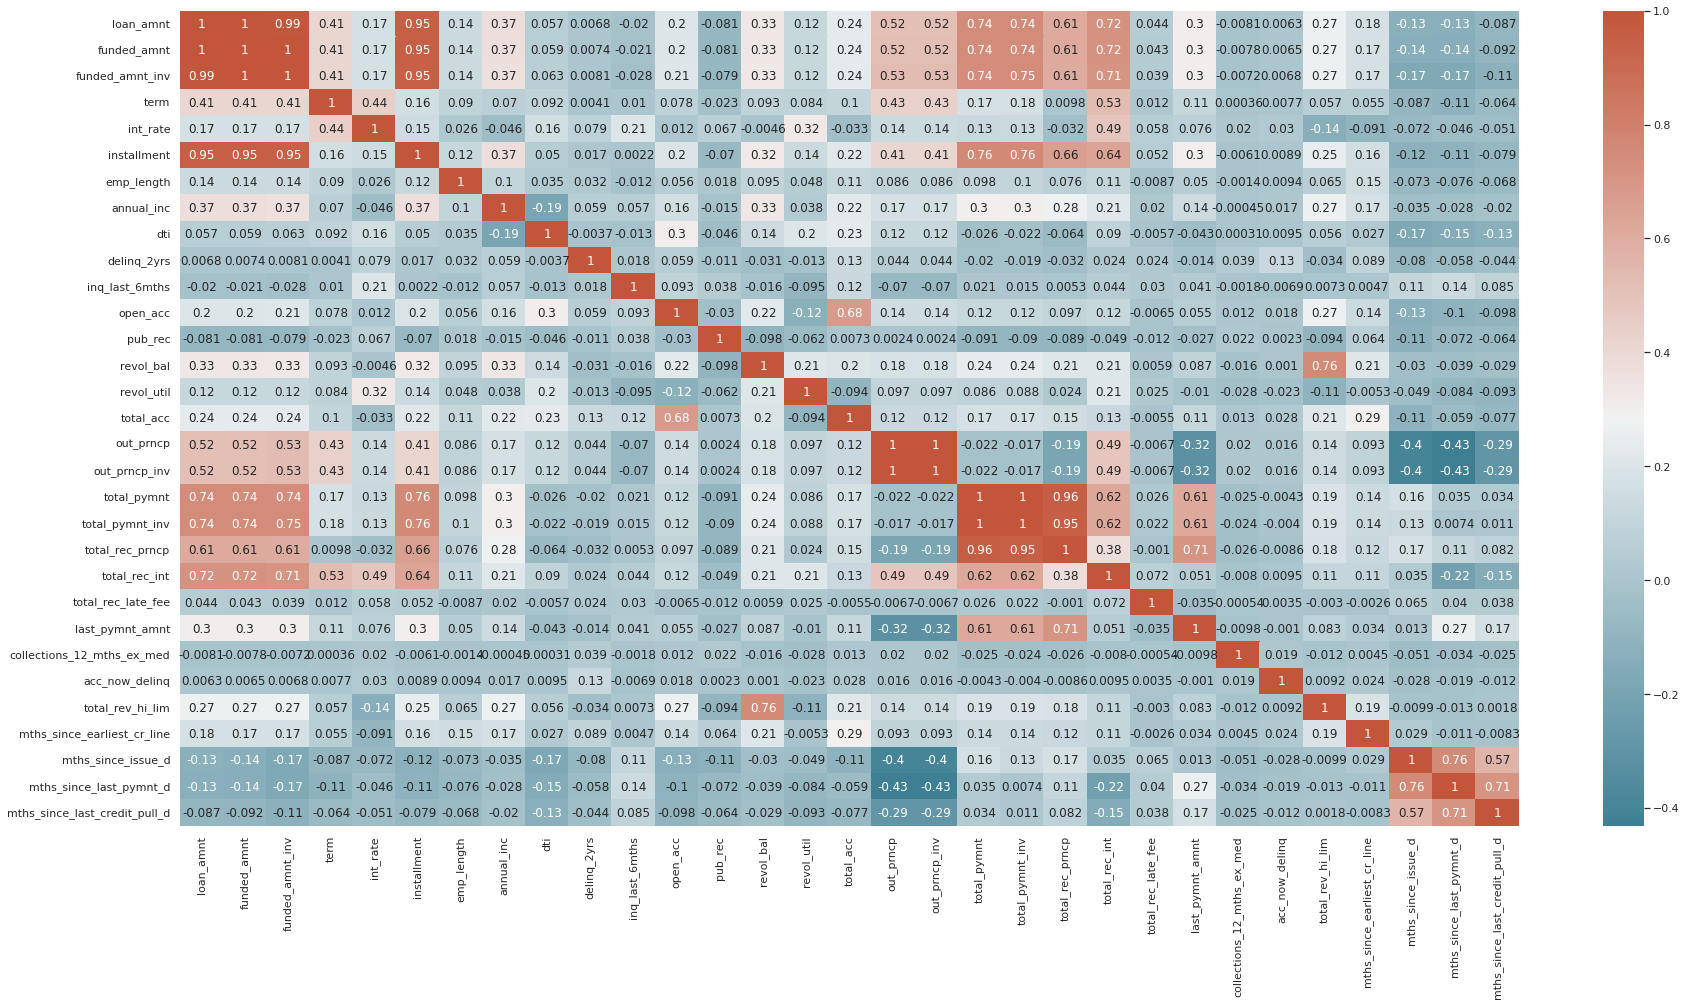

In [ ]:
fig, ax = plt.subplots(figsize=(30,15))         # Sample figsize in inches

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True)) #diverging_palette(220, 20, as_cmap=True)

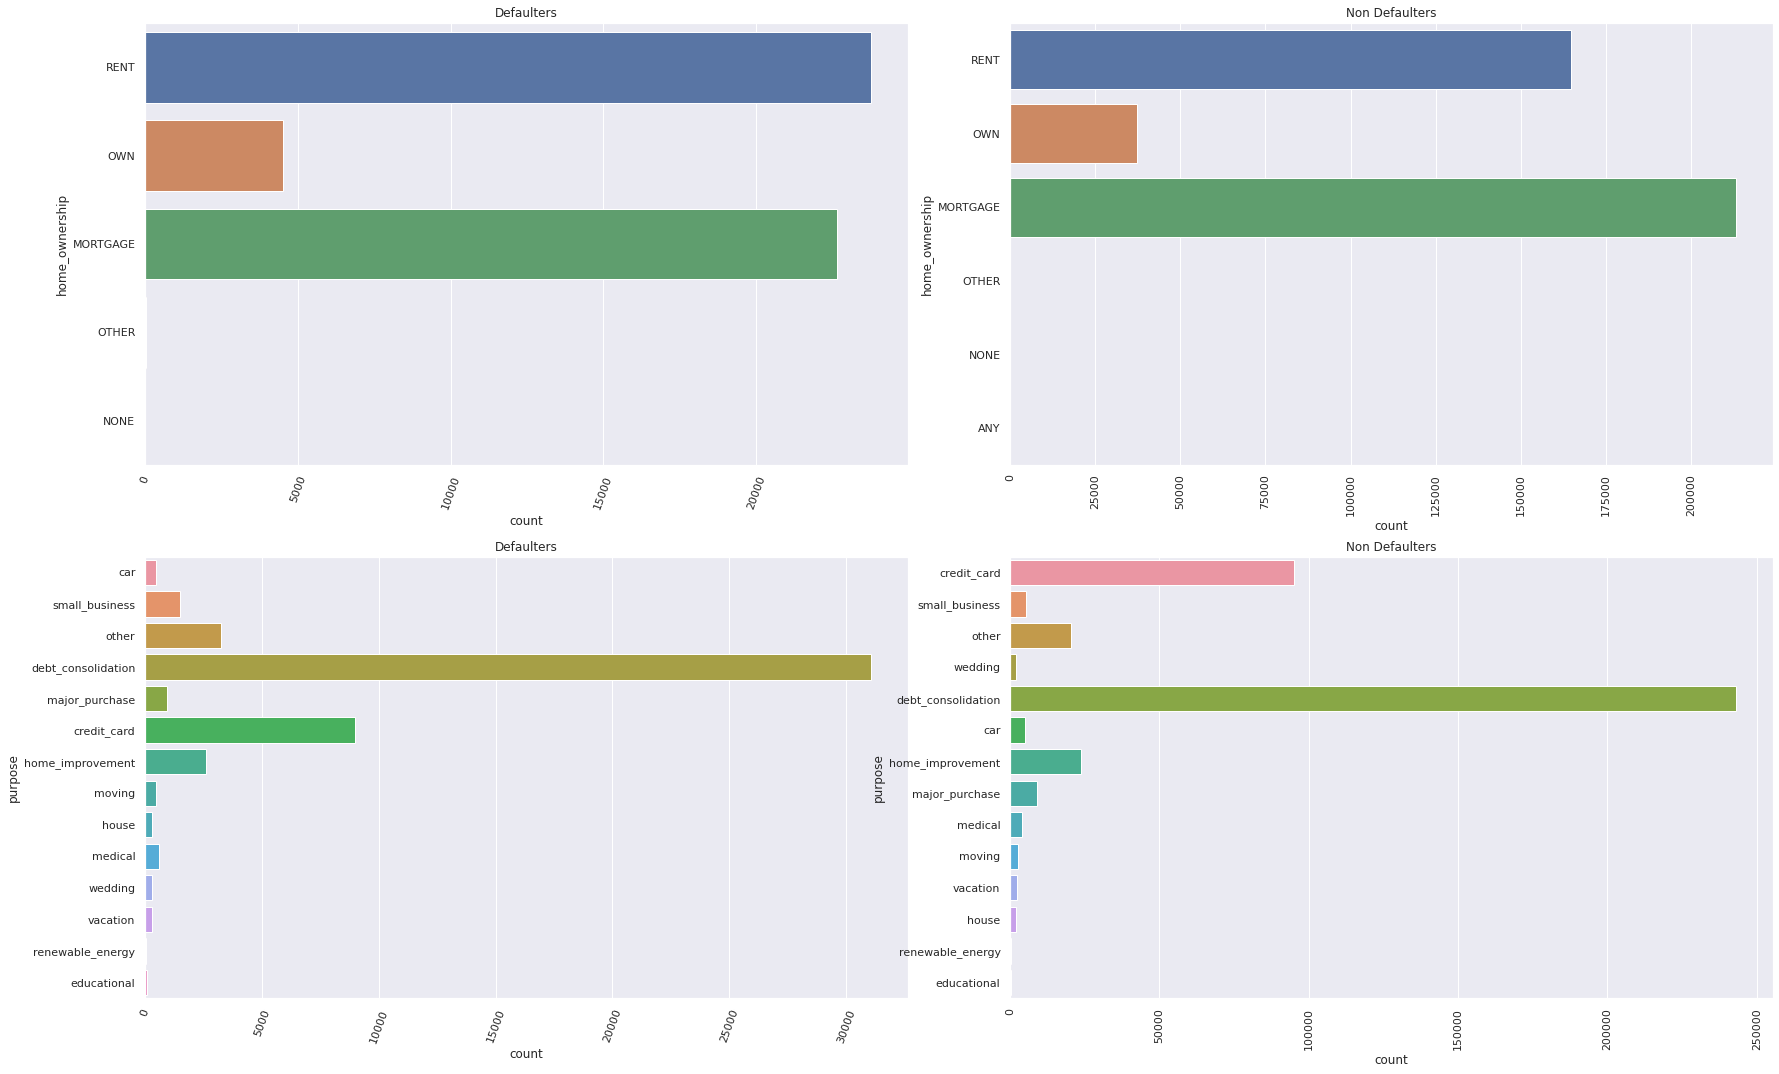

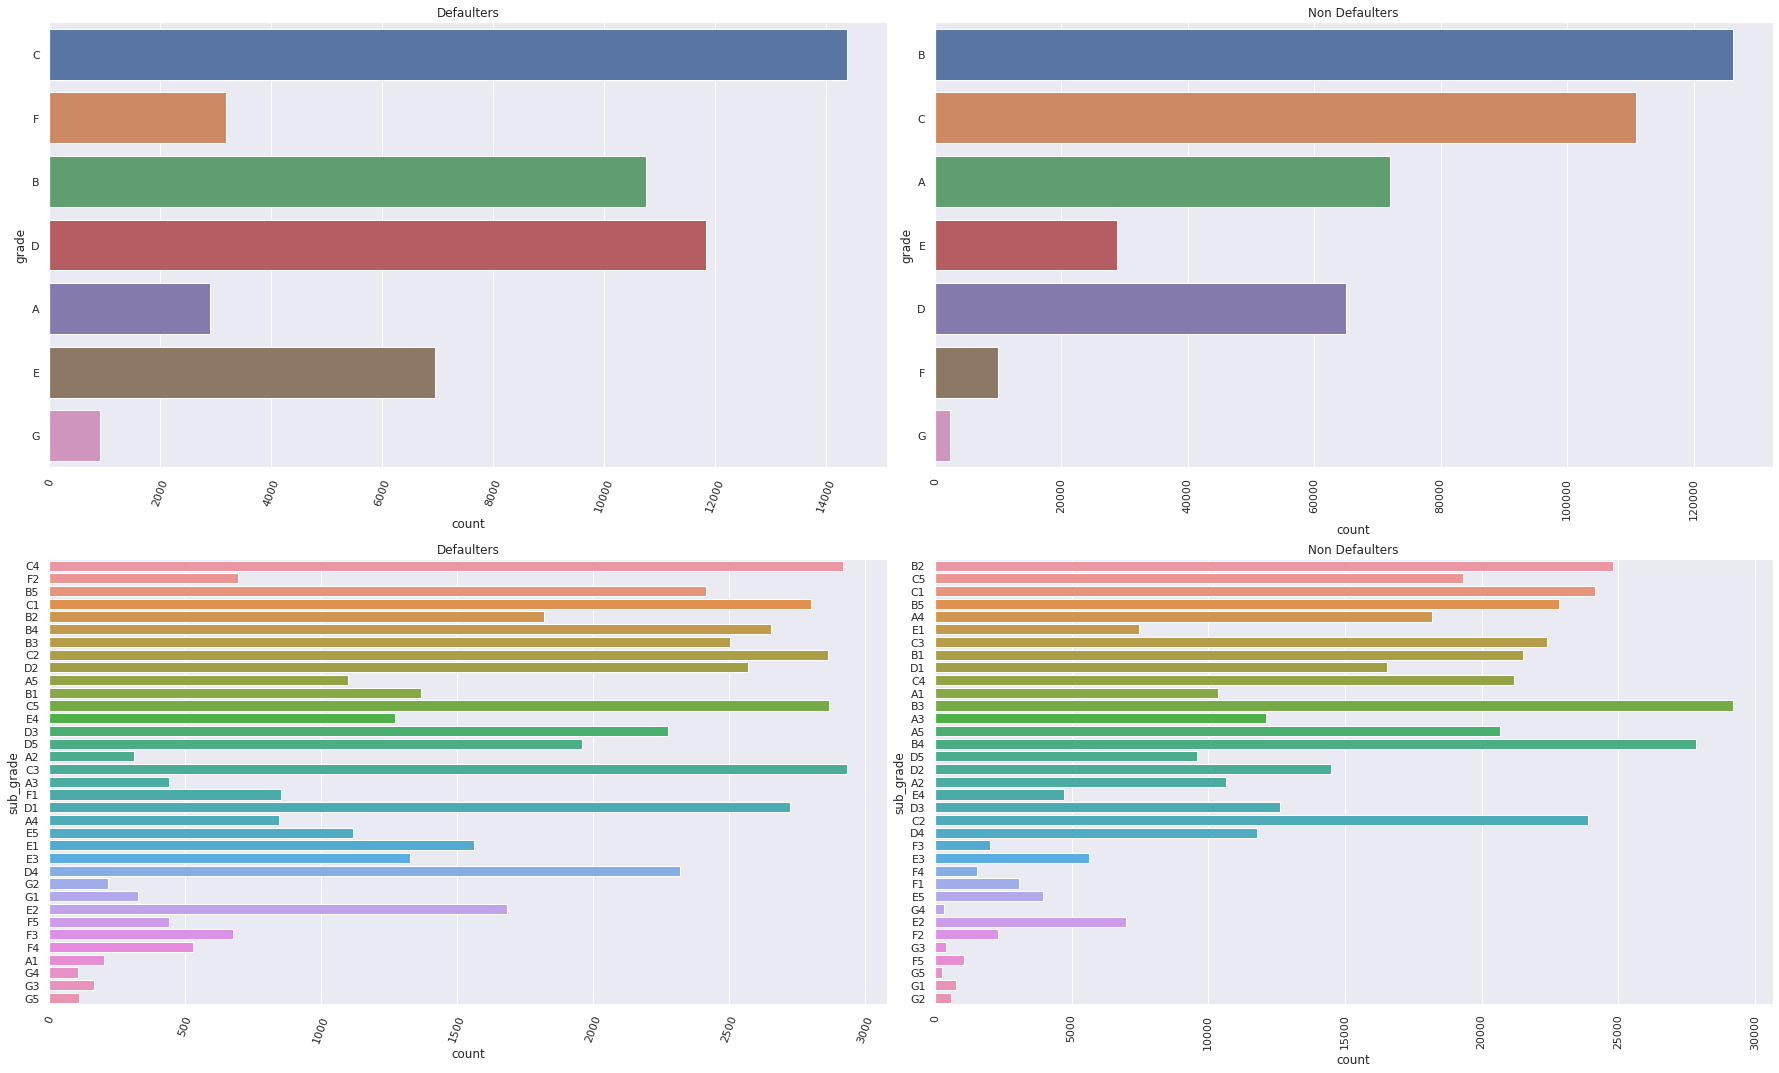

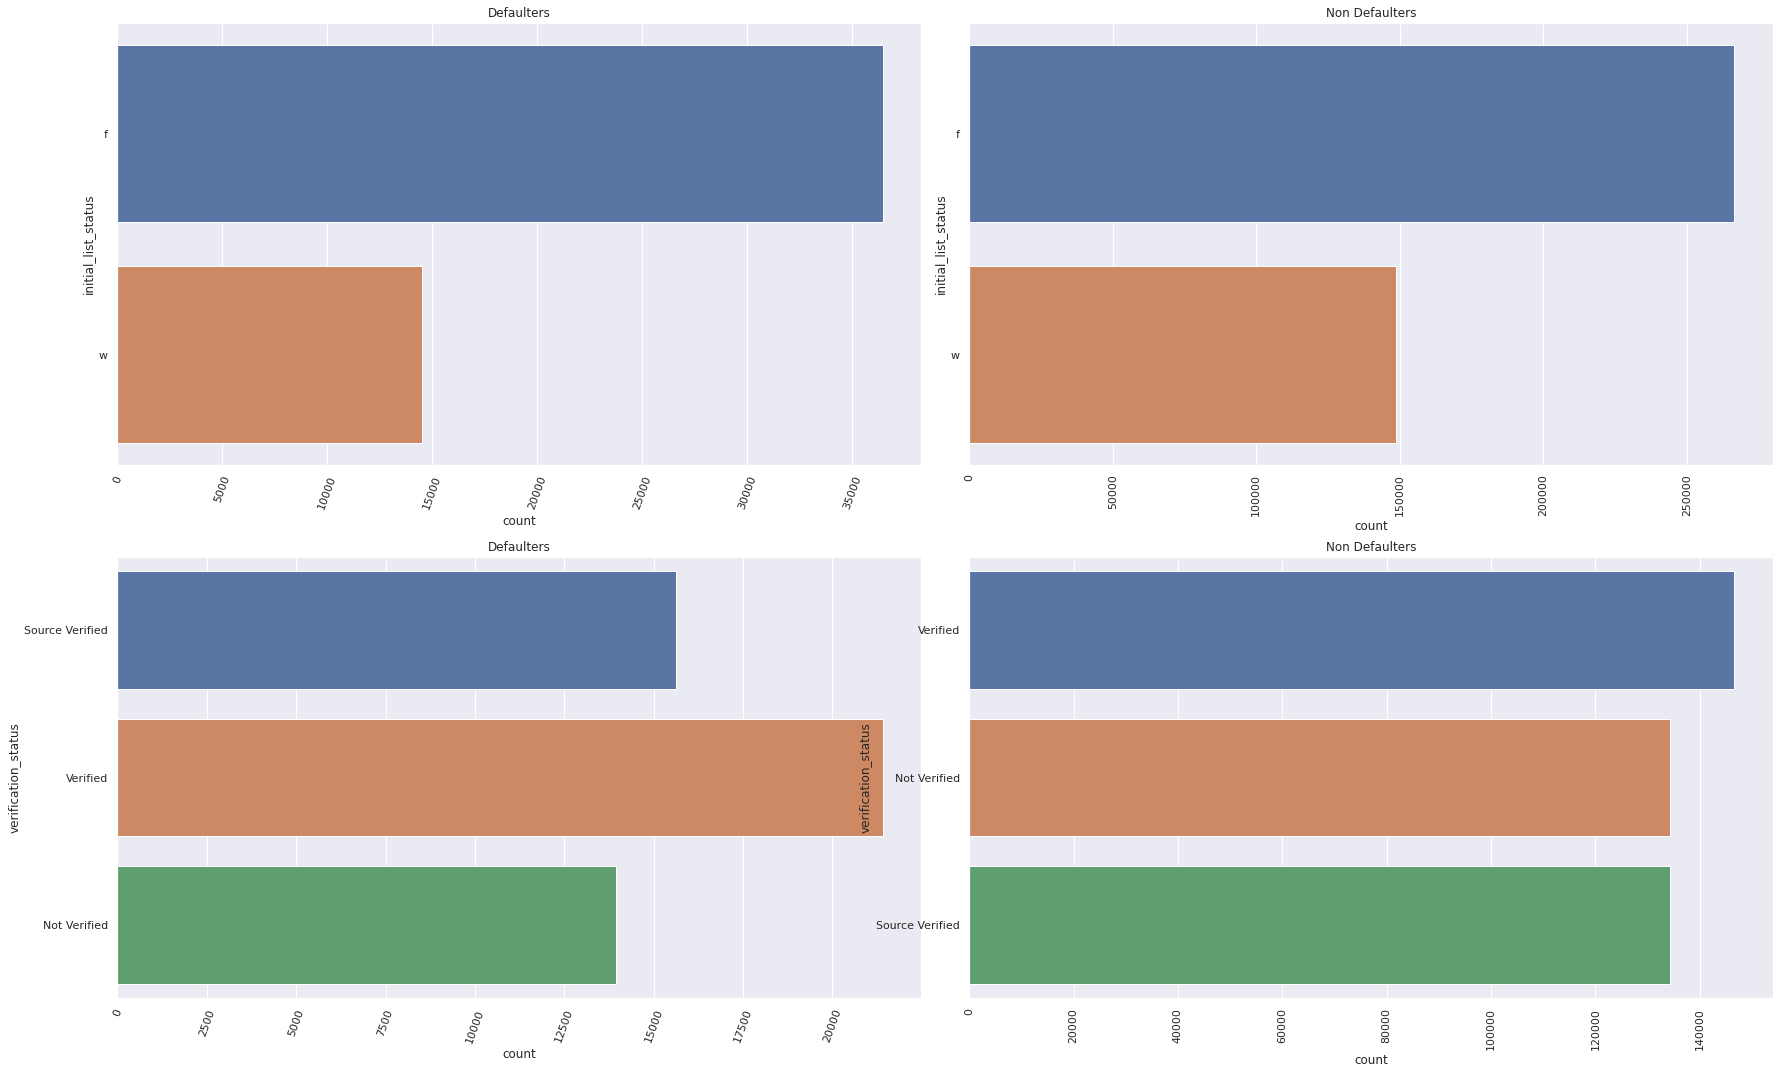

In [ ]:
## Univariate - Categorical 
def count_plot(columns):
    plt.figure(figsize=(25,15))

    i = 1
    for c in columns:
        plt.subplot(len(columns), 2, i)
        plt.tight_layout()
        plt.xticks(rotation=70)
        plt.title('Defaulters')
        sns.countplot(y=c,data=defaulters)
        i = i + 1

        plt.subplot(len(columns), 2, i)
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.title('Non Defaulters')
        sns.countplot(y=c,data=non_defaulter)
        i = i + 1
        
columns = ['home_ownership', 'purpose']
count_plot(columns)

columns = ['grade', 'sub_grade']
count_plot(columns)

columns = ['initial_list_status', 'verification_status']
count_plot(columns)

plt.show()

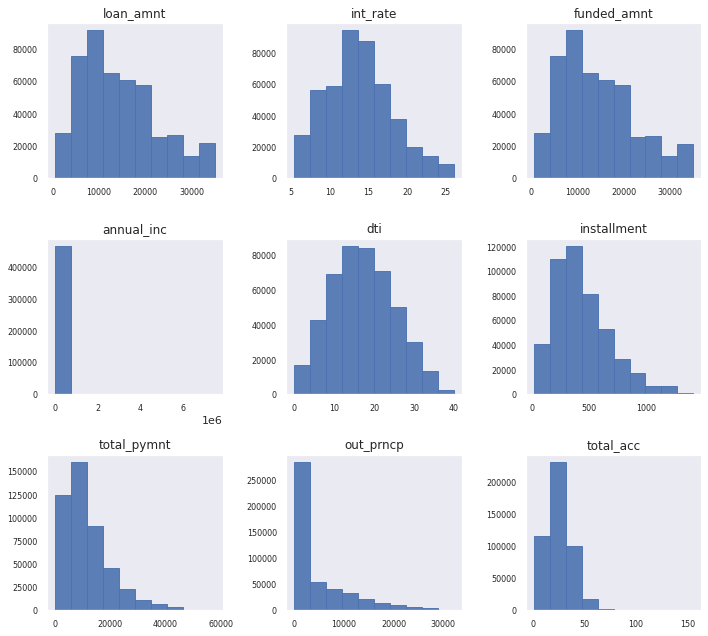

In [ ]:
# univariate plot of numeric
loan_data_file[['loan_amnt','int_rate','funded_amnt','annual_inc','dti','installment','total_pymnt','out_prncp','total_acc']].hist(figsize=(10,9), bins=10, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

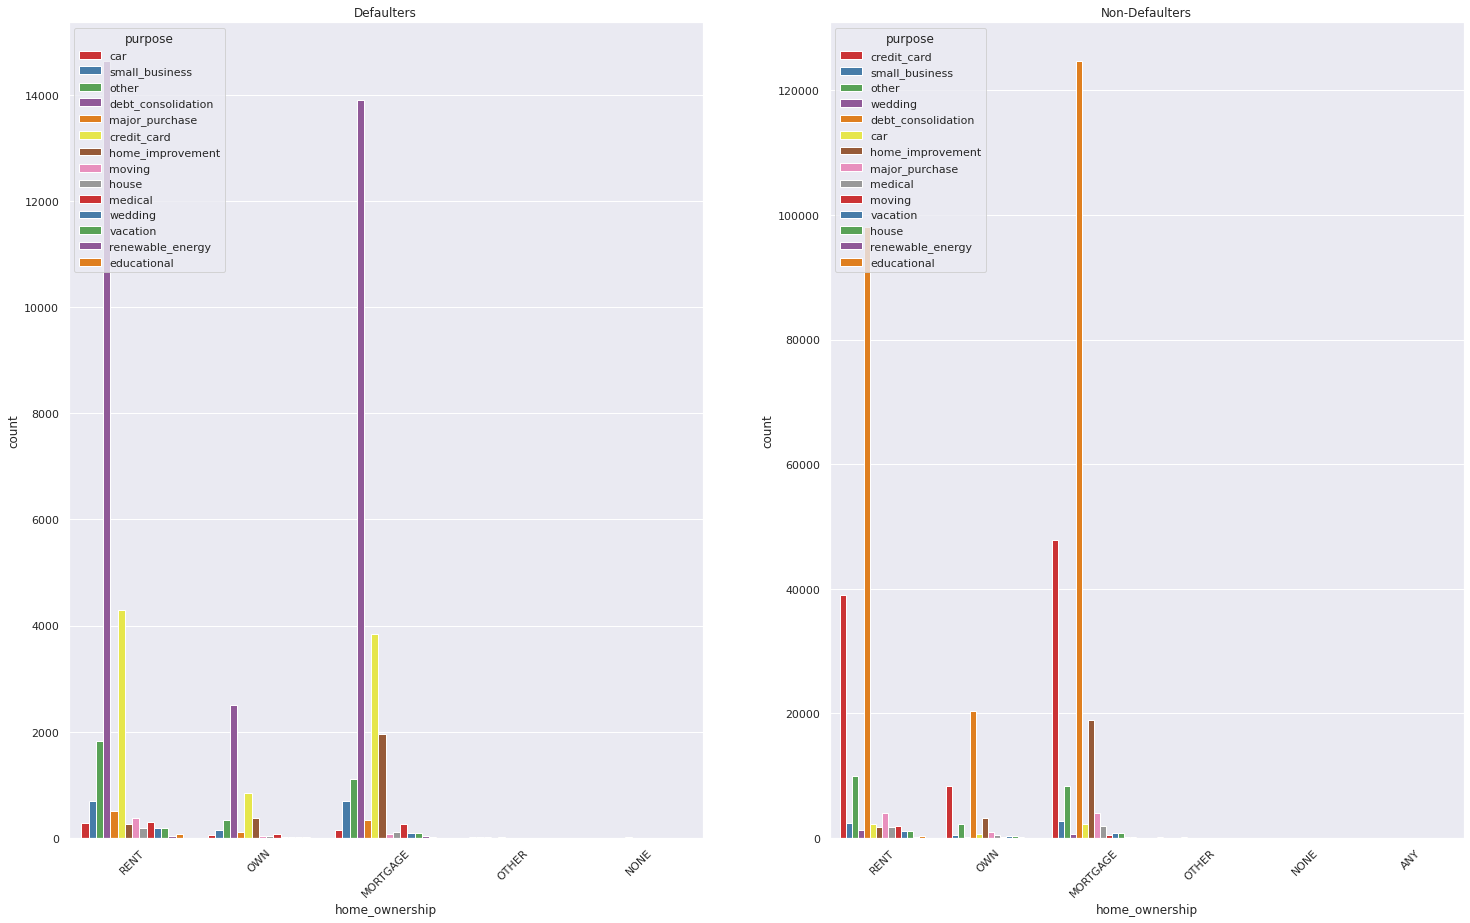

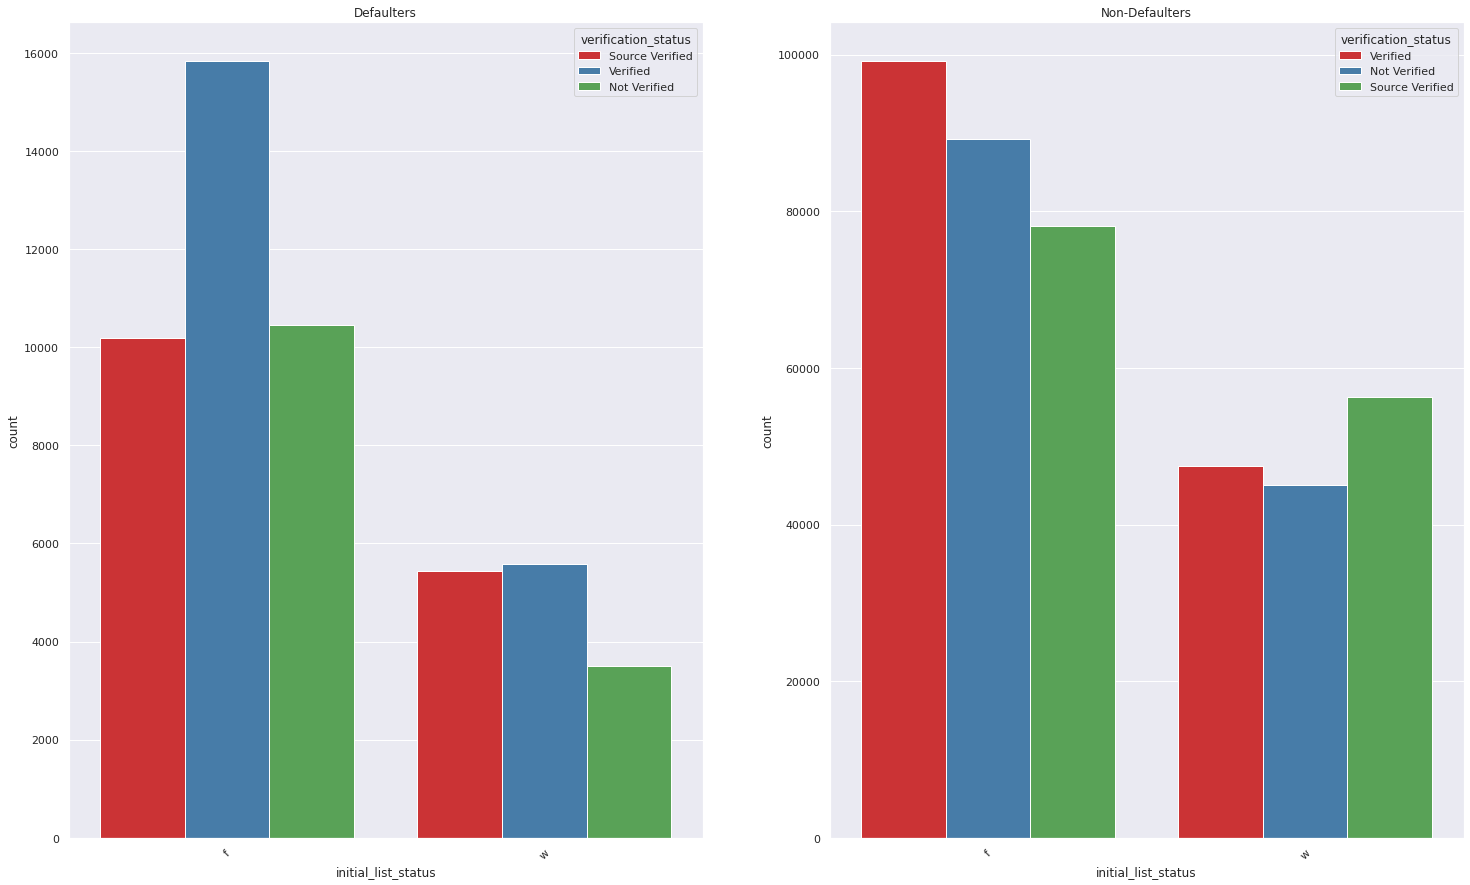

In [ ]:
# Bivariate Analysis - categorical vs categorical

def bivariate_countplot(pair):
    plt.figure(figsize=(25,15))
    plt.tight_layout()
    plt.subplot(1,2,1)
    plt.xticks(rotation=45)

    plt.title('Defaulters')
    sns.countplot(x=pair[0], hue=pair[1],data=defaulters,palette='Set1')

    plt.subplot(1,2,2)
    plt.xticks(rotation=45)

    plt.title('Non-Defaulters')
    sns.countplot(x=pair[0], hue=pair[1],data=non_defaulter,palette='Set1')
    plt.show()
    

bivariate_countplot(('home_ownership', 'purpose'))
bivariate_countplot(('initial_list_status', 'verification_status'))

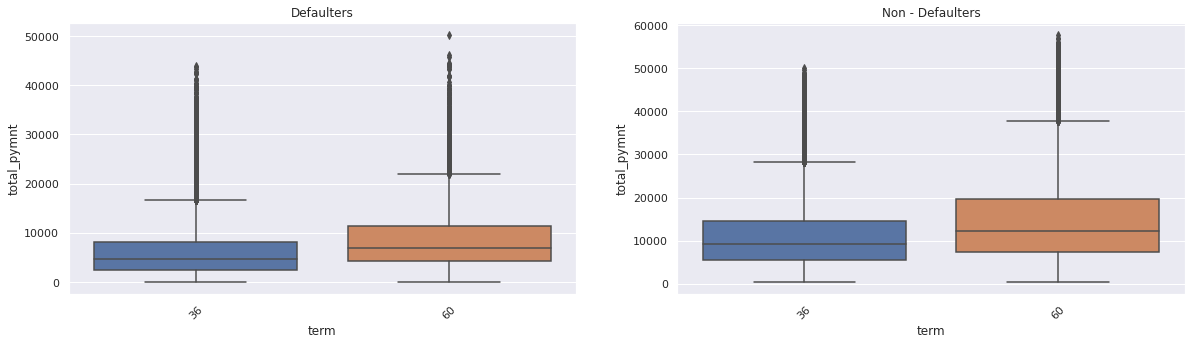

In [ ]:
# bi variate - cont vs cat
# lets  observe the spread
def bivariate_plot(pair, figsize=(20,5)):
    plt.figure(figsize=figsize)

    plt.subplot(1,2,1)
    plt.title('Defaulters')
    plt.xticks(rotation=45)

    sns.boxplot(x=pair[0],y=pair[1],data=defaulters)

    plt.subplot(1,2,2)
    plt.title('Non - Defaulters')
    plt.xticks(rotation=45)

    sns.boxplot(x=pair[0],y=pair[1],data=non_defaulter)
    plt.show()


bivariate_plot(('term', 'total_pymnt'))


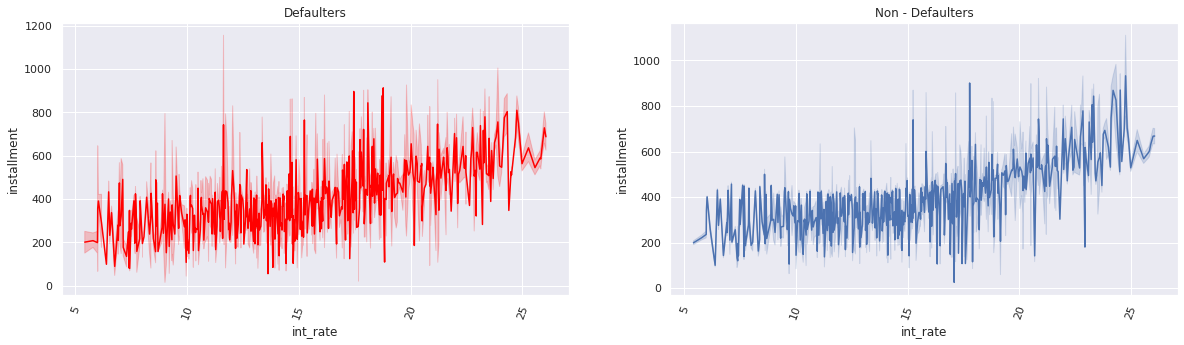

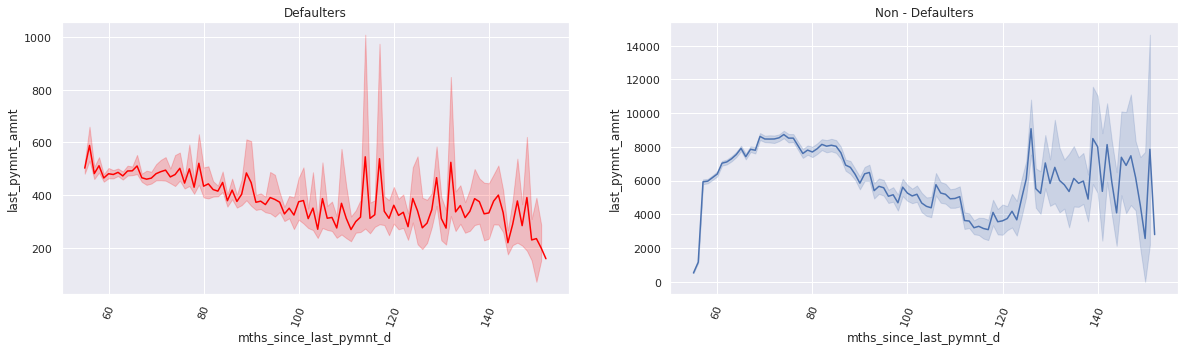

In [ ]:
##bivariate plot of cont vs cont
def lineplot(pair):
    plt.figure(figsize=(20,5))

    plt.subplot(1, 2, 1)

    plt.xticks(rotation=70)
    plt.title('Defaulters')
    sns.lineplot(data=defaulters, x=pair[0], y=pair[1], color='red')

    plt.subplot(1, 2, 2)
    plt.xticks(rotation=70)
    plt.title('Non - Defaulters')
    sns.lineplot(data=non_defaulter, x=pair[0], y=pair[1])
    plt.show()

pair = ('int_rate', 'installment')
lineplot(pair)

pair = ('mths_since_last_pymnt_d', 'last_pymnt_amnt')
lineplot(pair)